In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the libraries**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

**MLPClassifier for Multi-Class Classification**

**1.  Loading the data**

In [ ]:
position_data = pd.read_csv("/content/Position_data_final_augmented.csv")
position_data.columns

Index(['index', 'beam_index_1', 'Latitude', 'Longitude'], dtype='object')

**3.2 Data pre-processing**

In [ ]:
x = position_data.drop(['index','beam_index_1'], axis=1)
y = position_data['beam_index_1']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [ ]:
x

,Latitude,Longitude
0,33.420694,-111.928930
1,33.420639,-111.929003
2,33.420774,-111.929004
3,33.420561,-111.928935
4,33.420662,-111.929004
...,...,...
7763,33.420576,-111.929008
7764,33.420579,-111.928934
7765,33.420521,-111.928933
7766,33.420525,-111.928999


In [ ]:
y

0       37
1       34
2        4
3       51
4       29
        ..
7763    48
7764    49
7765    57
7766    55
7767     2
Name: beam_index_1, Length: 7768, dtype: int64

In [ ]:
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
testX_scaled[0]

array([ 0.86430172, -0.87720441])

4.3 MLPClassifier


In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 2000,activation = 'tanh',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=2000)

**Model Evaluation**

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.48


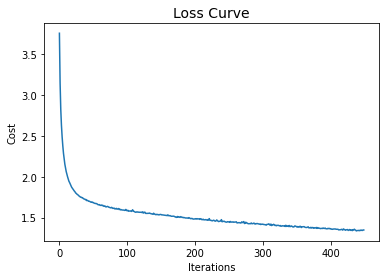

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


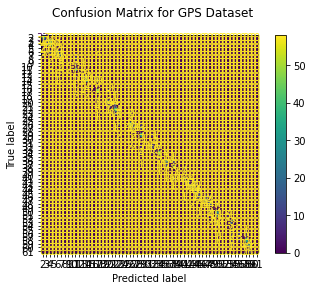

In [ ]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for GPS Dataset")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


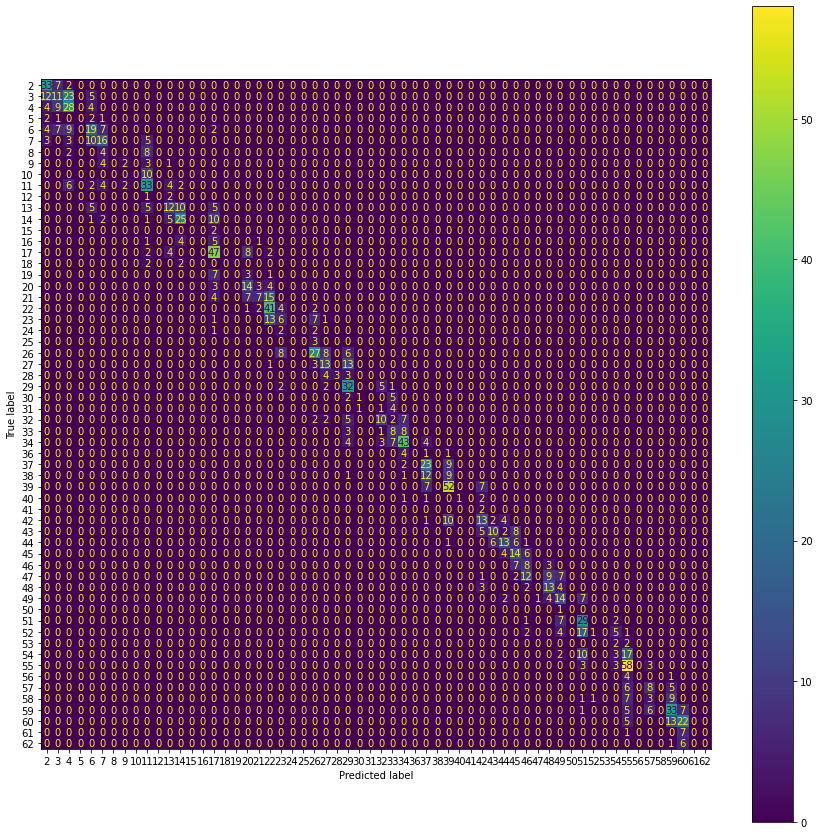

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(mlp_clf, testX_scaled, testY, ax=ax)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,

KeyboardInterrupt



In [ ]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 0.39
